# HW-01, Q-02
This is the work associated with part of the homework. I already have hte dataset in the repository so I will get started immediately with the following.

For the year 2020, construct the following behavioral networks:
1. the 5cm proximity network.
2. The touch network.
3. The mating network.

For each network clean the data in the following way:
- Remove beetles with unkown identities.
- Separate beetles into different condos.

In [81]:
# Necessary imports.
import polars as pl
import matplotlib.pyplot as plt
import networkx as nx

In [82]:
df = pl.read_csv('cook-social-2020.csv') # Load data
df.sample(5) # Just to see if everything looks right.

datetime,condo,focal_id,sex,behavior,grid_cell,cell_location,partner_id,partner_interaction
str,str,str,str,str,str,str,str,str
"""2018-07-01T22:08:00Z""","""1A""","""3B6""","""F""","""S""","""C18""","""B""",null,null
"""2019-07-04T08:16:00Z""","""1B""","""3VM""","""F""","""S""","""B02""","""C""","""2AL""","""Touch Partners"""
"""2018-07-30T08:45:00Z""","""1B""","""2O7""","""M""","""S""","""M""",null,null,null
"""2018-07-14T21:45:00Z""","""6B""","""2LM""","""M""","""S""","""W""",null,null,null
"""2018-08-08T09:17:00Z""","""4A""","""2PH""","""M""","""S""","""W""",null,null,null


In [83]:
new_col = df["datetime"].str.to_datetime("%Y-%m-%dT%H:%M:%S%Z", strict=False)
df = df.replace_column(0, new_col).drop_nulls()


In [84]:
bad_values = ['UK', 'UKM', 'UKF']
df = df.filter(~pl.col("focal_id").is_in(bad_values))
df = df.filter(~pl.col("partner_id").is_in(bad_values))

In [85]:
df

datetime,condo,focal_id,sex,behavior,grid_cell,cell_location,partner_id,partner_interaction
datetime[μs],str,str,str,str,str,str,str,str
2018-06-27 06:32:00,"""6B""","""2MO""","""M""","""CRT""","""C01""","""B""","""3TL""","""Mating Partners"""
2018-06-27 06:32:00,"""6B""","""3TL""","""F""","""CRT""","""C01""","""B""","""2MO""","""Mating Partners"""
2018-06-27 06:32:00,"""6B""","""3TL""","""F""","""CRT""","""C01""","""B""","""3VX""","""5 CM Partners"""
2018-06-27 06:32:00,"""6B""","""3VX""","""F""","""S""","""C01""","""T""","""3TL""","""5 CM Partners"""
2018-06-27 06:32:00,"""6B""","""3VX""","""F""","""S""","""C01""","""T""","""2MO""","""5 CM Partners"""
…,…,…,…,…,…,…,…,…
2020-08-18 22:00:00,"""6B""","""5YN""","""F""","""CRT""","""B18""","""C""","""4K2""","""Mating Partners"""
2020-08-22 23:21:00,"""6B""","""4AW""","""M""","""CRT""","""C18""","""B""","""5AS""","""Mating Partners"""
2020-08-22 23:21:00,"""6B""","""5AS""","""F""","""CRT""","""C18""","""B""","""4AW""","""Mating Partners"""


Now, we report more network statistics:
1. Number of Nodes
2. Number of Edges
3. Minimum Degree
4. Maximum Degree
5. Mean Degree
6. Network Density

Over all condos in 2020, per network type.

In [86]:
df_2020 = df.filter(pl.col('datetime').dt.year() == 2020)

# I have a function I made for Lab 02 that I can tweak to fit here.

def network_interactions(network: str):
    # Build 'Mating Partners' network (remove isolates).
    df = df_2020.filter(pl.col('partner_interaction') == f'{network}')

    G = nx.Graph()
    G.add_nodes_from(pl.concat([df['focal_id'], df['partner_id']]).to_list())
    G.add_edges_from(df.select(["focal_id","partner_id"]).rows())

    # Removing isolates.
    G.remove_nodes_from(list(nx.isolates(G)))

    # Get the stats.
    n = G.number_of_nodes()
    m = G.number_of_edges()
    mean_deg = (sum(dict(G.degree()).values()) / n ) # sum the dict values divide by n. 
    density = (2 * m)/(n * (n-1)) # density formula
    min_deg_node = min(dict(G.degree()), key = dict(G.degree()).get)
    min_deg = dict(G.degree())[min_deg_node]
    max_deg_node = max(dict(G.degree()), key = dict(G.degree()).get)
    max_deg = dict(G.degree())[max_deg_node]

    # Draw it up.
    plt.figure(figsize=(6,6))
    pos = nx.spring_layout(G, seed = 1)
    nx.draw(G, pos, node_size = 40, with_labels = False)
    plt.title(f'{network} — 2020\nNodes: {n} | Edges: {m} | Min Deg: {min_deg} | Max Deg: {max_deg} | Mean Deg: {mean_deg:.3f} | Density: {density:.3f}')
    plt.show()

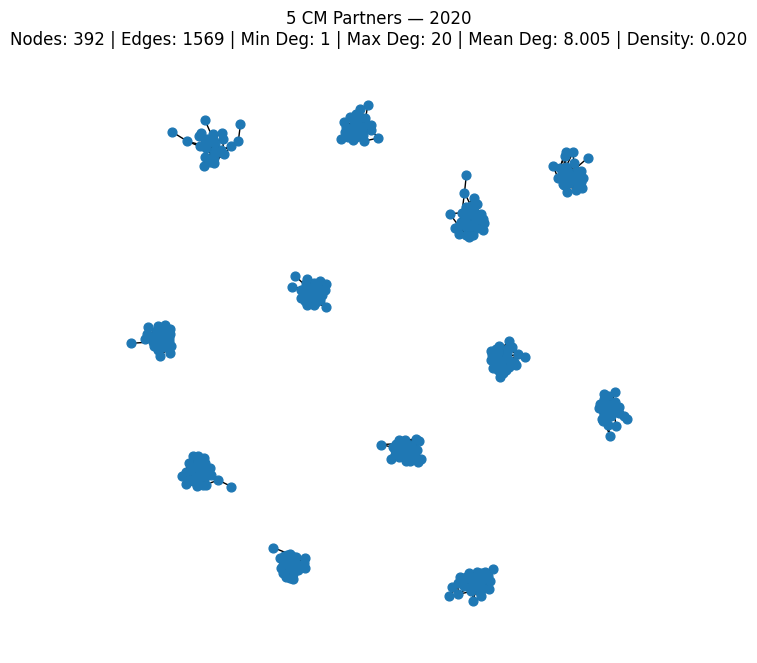

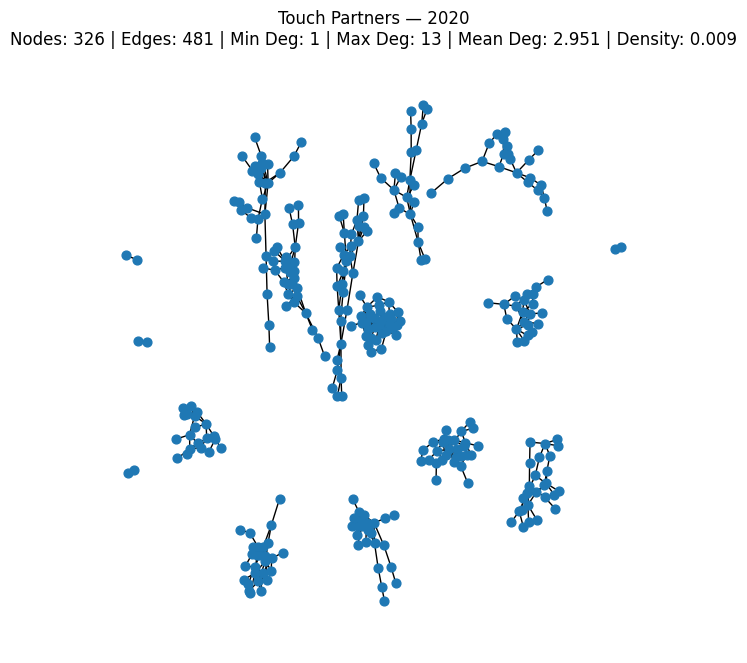

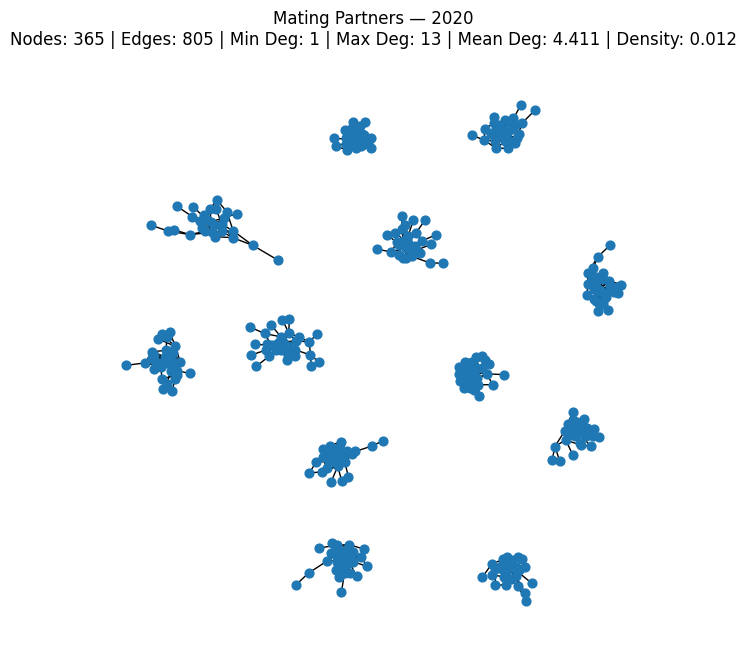

In [87]:
network_interactions('5 CM Partners')
network_interactions('Touch Partners')
network_interactions('Mating Partners')

In [ ]:
data = []

for network in ['5 CM Partners', 'Touch Partners', 'Mating Partners']:

    df = df_2020.filter(pl.col('partner_interaction') == f'{network}')

    G = nx.Graph()
    G.add_nodes_from(pl.concat([df['focal_id'], df['partner_id']]).to_list())
    G.add_edges_from(df.select(["focal_id","partner_id"]).rows())

    # Removing isolates.
    G.remove_nodes_from(list(nx.isolates(G)))

    # Get the stats.
    n = G.number_of_nodes()
    m = G.number_of_edges()
    mean_deg = (sum(dict(G.degree()).values()) / n ) # sum the dict values divide by n. 
    density = (2 * m)/(n * (n-1)) # density formula
    min_deg_node = min(dict(G.degree()), key = dict(G.degree()).get)
    min_deg = dict(G.degree())[min_deg_node]
    max_deg_node = max(dict(G.degree()), key = dict(G.degree()).get)
    max_deg = dict(G.degree())[max_deg_node]

    data.append([network, n, m, min_deg, max_deg, mean_deg, density])

pl.DataFrame(data, schema = ['Network', 'Nodes', 'Edges', 'Min Degree', 'Max Degree', 'Mean Degree', 'Density'], orient = 'row')

Network,Nodes,Edges,Min Degree,Max Degree,Mean Degree,Density
str,i64,i64,i64,i64,f64,f64
"""5 CM Partners""",392,1569,1,20,8.005102,0.020473
"""Touch Partners""",326,481,1,13,2.95092,0.00908
"""Mating Partners""",365,805,1,13,4.410959,0.012118


In [ ]:
import seaborn as sns

condo_list = sorted(list(set(df['condo'])))
means = []
for network in ['5 CM Partners', 'Touch Partners', 'Mating Partners']:
    
    network_df = df.filter(pl.col('partner_interaction') == f'{network}')   
    network_means = []
    
    for condo in condo_list:
        condo_df = network_df.filter(pl.col('condo') == f'{condo}')
        
        G = nx.Graph()
        G.add_nodes_from(pl.concat([condo_df['focal_id'], condo_df['partner_id']]).to_list())
        G.add_edges_from(condo_df.select(["focal_id","partner_id"]).rows())
        G.remove_nodes_from(list(nx.isolates(G)))

        n = G.number_of_nodes()
        m = G.number_of_edges()
        mean_deg = (sum(dict(G.degree()).values()) / n )

        network_means.append(mean_deg)

    means.append([network_means])





datetime,condo,focal_id,sex,behavior,grid_cell,cell_location,partner_id,partner_interaction
datetime[μs],str,str,str,str,str,str,str,str
2018-06-27 06:32:00,"""6B""","""2MO""","""M""","""CRT""","""C01""","""B""","""3TL""","""Mating Partners"""
2018-06-27 06:32:00,"""6B""","""3TL""","""F""","""CRT""","""C01""","""B""","""2MO""","""Mating Partners"""
2018-06-28 01:04:00,"""6B""","""2AH""","""M""","""CRT""","""A02""","""B""","""3PS""","""Mating Partners"""
2018-06-28 01:04:00,"""6B""","""3PS""","""F""","""CRT""","""A02""","""B""","""2AH""","""Mating Partners"""
2018-06-28 01:09:00,"""6B""","""2BW""","""M""","""CRT""","""B09""","""C""","""3NF""","""Mating Partners"""
…,…,…,…,…,…,…,…,…
2020-08-23 23:15:00,"""6B""","""5KT""","""F""","""CRT""","""B10""","""B""","""4PF""","""Mating Partners"""
2020-08-18 22:00:00,"""6B""","""4K2""","""M""","""CRT""","""B18""","""C""","""5YN""","""Mating Partners"""
2020-08-18 22:00:00,"""6B""","""5YN""","""F""","""CRT""","""B18""","""C""","""4K2""","""Mating Partners"""


In [94]:
df

datetime,condo,focal_id,sex,behavior,grid_cell,cell_location,partner_id,partner_interaction
datetime[μs],str,str,str,str,str,str,str,str
2018-06-27 06:32:00,"""6B""","""2MO""","""M""","""CRT""","""C01""","""B""","""3TL""","""Mating Partners"""
2018-06-27 06:32:00,"""6B""","""3TL""","""F""","""CRT""","""C01""","""B""","""2MO""","""Mating Partners"""
2018-06-27 06:32:00,"""6B""","""3TL""","""F""","""CRT""","""C01""","""B""","""3VX""","""5 CM Partners"""
2018-06-27 06:32:00,"""6B""","""3VX""","""F""","""S""","""C01""","""T""","""3TL""","""5 CM Partners"""
2018-06-27 06:32:00,"""6B""","""3VX""","""F""","""S""","""C01""","""T""","""2MO""","""5 CM Partners"""
…,…,…,…,…,…,…,…,…
2020-08-18 22:00:00,"""6B""","""5YN""","""F""","""CRT""","""B18""","""C""","""4K2""","""Mating Partners"""
2020-08-22 23:21:00,"""6B""","""4AW""","""M""","""CRT""","""C18""","""B""","""5AS""","""Mating Partners"""
2020-08-22 23:21:00,"""6B""","""5AS""","""F""","""CRT""","""C18""","""B""","""4AW""","""Mating Partners"""
